In [1]:
#! /usr/bin/python3
import re
import os
import dendropy
from dendropy.calculate import treecompare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input the path to the gon_phyling folder you wish to analyze
replicate_dir = ""

# path to "TRUE" tree file
true_tree_file = ""

In [9]:
# generate robinson-foulds distances for phycorder-gon_phyling tree comparisons
maj_rule_weighted_rfs_dict = {}
maj_rule_unweighted_rfs_dict = {}

weighted_rfs_dict = {}
unweighted_rfs_dict = {}

replicate_count = 0
taxa_count = []
maj_rule_taxa_count = []

os.chdir(replicate_dir)

list_of_rep_dirs = []
dir_list = os.listdir(".")
for file in dir_list:
    if "combined_output-" in file:
        list_of_rep_dirs.append(file)
    else:
        continue

# looping through directories of runs
for dir_name in list_of_rep_dirs:
    os.chdir(dir_name)
    rep_files = os.listdir(".")
    phycord_best_trees = []
    gon_phy_best_trees = []
    phycord_maj_rule_trees = []
    gon_phy_maj_rule_trees = []
    
    replicate_count+=1
    
    maj_rule_weighted_rfs_dict[replicate_count] = {}
    maj_rule_unweighted_rfs_dict[replicate_count] = {}
    
    unweighted_rfs_dict[replicate_count] = {}
    weighted_rfs_dict[replicate_count] = {}
    
    weighted_rfs = []
    unweighted_rfs = []
    
    maj_rule_weighted_rfs = []
    maj_rule_unweighted_rfs = []
    
    for file in rep_files:
        if "RAxML_bestTree.phycorder-" in file:
            phycord_best_trees.append(file)
        elif "RAxML_bestTree.gon_phy-" in file:
            gon_phy_best_trees.append(file)
        elif "RAxML_bipartitions.phycorder_majority_rule-" in file:
            phycord_maj_rule_trees.append(file)
        elif "RAxML_bipartitions.gon_phy_majority_rule-" in file:
            gon_phy_maj_rule_trees.append(file)
        
        else:
            continue
    
    phycord_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    phycord_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    
    #print("\n")
    #print("**")
    #print("NEW REPLICATE NUMBERS")
    #print("**")
    #print("\n")
    
    # looping through output files in directory
    for phycord_count, phycord_tree in enumerate(phycord_best_trees):
        tree_file_open = open(phycord_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in taxa_count:
            taxa_count.append(step_count_taxa)
        for gon_phy_count, gon_phy_tree in enumerate(gon_phy_best_trees):
            if phycord_count == gon_phy_count:
                
                
                # establish common taxon namespace
                tns = dendropy.TaxonNamespace()
                
                # ensure all trees loaded use common namespace
                tree1 = dendropy.Tree.get(
                path = gon_phy_tree,
                schema='newick',
                taxon_namespace=tns)

                tree2 = dendropy.Tree.get(
                path = phycord_tree,
                schema = 'newick',
                taxon_namespace = tns)
    
                best_tree_unweighted = treecompare.symmetric_difference(tree1, tree2)
                #print(best_tree_unweighted)
                unweighted_rfs.append(best_tree_unweighted)
                
                best_tree_weighted = treecompare.weighted_robinson_foulds_distance(tree1, tree2)
                #print(best_tree_weighted)
                weighted_rfs.append(best_tree_weighted)
                print(weighted_rfs)
                
    for phycord_count, phycord_maj_rule_tree in enumerate(phycord_maj_rule_trees):
        tree_file_open = open(phycord_maj_rule_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in maj_rule_taxa_count:
            maj_rule_taxa_count.append(step_count_taxa)
        for gon_phy_count, gon_phy_maj_rule_tree in enumerate(gon_phy_maj_rule_trees):
            if phycord_count == gon_phy_count:
                
                
                # establish common taxon namespace
                tns = dendropy.TaxonNamespace()
                
                # ensure all trees loaded use common namespace
                tree1 = dendropy.Tree.get(
                path = gon_phy_maj_rule_tree,
                schema='newick',
                taxon_namespace=tns)

                tree2 = dendropy.Tree.get(
                path = phycord_maj_rule_tree,
                schema = 'newick',
                taxon_namespace = tns)
    
                maj_rule_unweighted = treecompare.symmetric_difference(tree1, tree2)
                #print(best_tree_unweighted)
                maj_rule_unweighted_rfs.append(maj_rule_unweighted)
                
                maj_rule_weighted = treecompare.weighted_robinson_foulds_distance(tree1, tree2)
                #print(best_tree_weighted)
                maj_rule_weighted_rfs.append(maj_rule_weighted)
    #print(unweighted_rfs)
    #print(weighted_rfs)
    #print(taxa_count)
    
    weight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(weighted_rfs):
            if num1 == num2:
                weight_temp_dict[count] = rf
    weighted_rfs_dict[replicate_count] = weight_temp_dict
    
    unweight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(unweighted_rfs):
            if num1 == num2:
                unweight_temp_dict[count] = rf
    unweighted_rfs_dict[replicate_count] = unweight_temp_dict
    
    mr_weight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(maj_rule_weighted_rfs):
            if num1 == num2:
                mr_weight_temp_dict[count] = rf
    maj_rule_weighted_rfs_dict[replicate_count] = mr_weight_temp_dict
    
    mr_unweight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(maj_rule_unweighted_rfs):
            if num1 == num2:
                mr_unweight_temp_dict[count] = rf
    maj_rule_unweighted_rfs_dict[replicate_count] = mr_unweight_temp_dict
    
                
    os.chdir(replicate_dir)
#print(unweighted_rfs_dict)
#print(weighted_rfs_dict)

unweighted_df = pd.DataFrame.from_dict(unweighted_rfs_dict ,orient='columns')
weighted_df = pd.DataFrame.from_dict(weighted_rfs_dict,orient='columns')
mr_unweighted_df = pd.DataFrame.from_dict(maj_rule_unweighted_rfs_dict ,orient='columns')
mr_weighted_df = pd.DataFrame.from_dict(maj_rule_weighted_rfs_dict,orient='columns')

mr_unweighted_df.head()

[0.0025564026251156348]
[0.0025564026251156348, 0.0061131174400408375]
[0.0025564026251156348, 0.0061131174400408375, 0.00631018603334739]
[0.0025564026251156348, 0.0061131174400408375, 0.00631018603334739, 0.007067067091778714]
[0.0025564026251156348, 0.0061131174400408375, 0.00631018603334739, 0.007067067091778714, 0.007443783606403854]
[0.0028785214249493767]
[0.0028785214249493767, 0.006210676435900126]
[0.0028785214249493767, 0.006210676435900126, 0.0062624764047161585]
[0.0028785214249493767, 0.006210676435900126, 0.0062624764047161585, 0.007119844042695275]
[0.0028785214249493767, 0.006210676435900126, 0.0062624764047161585, 0.007119844042695275, 0.007567065679445894]


,1,2


In [4]:
# process comparison df's for plotting
unweighted_df['mean rf'] = unweighted_df.mean(axis=1)
unweighted_mean = unweighted_df['mean rf']
unweighted_df['std'] = unweighted_df.std(axis=1)
unweighted_df.head()

mr_unweighted_df['mean rf'] = mr_unweighted_df.mean(axis=1)
mr_unweighted_mean = mr_unweighted_df['mean rf']
mr_unweighted_df['std'] = mr_unweighted_df.std(axis=1)
mr_unweighted_df.head()

weighted_df['mean rf'] = weighted_df.mean(axis=1)
weighted_mean = weighted_df['mean rf']
weighted_df['std'] = weighted_df.std(axis=1)
weighted_df.head()

mr_weighted_df['mean rf'] = mr_weighted_df.mean(axis=1)
mr_weighted_mean = mr_weighted_df['mean rf']
mr_weighted_df['std'] = mr_weighted_df.std(axis=1)
mr_weighted_df.head()

unweighted_df['isolate number'] = unweighted_df.index
unweighted_df.head()

mr_unweighted_df['isolate number'] = mr_unweighted_df.index
mr_unweighted_df.head()

weighted_df['isolate number'] = weighted_df.index
weighted_df.head()

mr_weighted_df['isolate number'] = mr_weighted_df.index
mr_weighted_df.head()

,1,2,mean rf,std,isolate number


In [10]:
# Calculating absolute Error section between "True" tree and esimate trees

tree = open(true_tree_file,'r')
read_tree = tree.read()

# establishes how to count each taxon in a tree in order to calculate maxRF
name_id = "taxon"

# regex that searches for names based on how we expect taxa to be named in the tree
name_regex = name_id + "_\d+"

name_grabber = re.compile(name_regex)

# find all taxa names in tree
true_tree_taxa_names = re.findall(name_grabber, read_tree)

# count the number of taxa in the tree
taxa_counter = 0
for item in true_tree_taxa_names:
    taxa_counter+=1
    
# print(taxa_counter)

# begin getting rf comparisons for all trees vs the TRUE tree
phycorder_maj_rule_weighted_rfs_dict = {}
phycorder_maj_rule_unweighted_rfs_dict = {}

gon_phyling_maj_rule_weighted_rfs_dict = {}
gon_phyling_maj_rule_unweighted_rfs_dict = {}

phycorder_weighted_rfs_dict = {}
phycorder_unweighted_rfs_dict = {}

gon_phyling_weighted_rfs_dict = {}
gon_phyling_unweighted_rfs_dict = {}

replicate_count = 0
taxa_count = []
maj_rule_taxa_count = []

os.chdir(replicate_dir)

list_of_rep_dirs = []
dir_list = os.listdir(".")
for file in dir_list:
    if "combined_output-" in file:
        list_of_rep_dirs.append(file)
    else:
        continue

print(list_of_rep_dirs)

# looping through directories of runs
for dir_name in list_of_rep_dirs:
    os.chdir(dir_name)
    rep_files = os.listdir(".")
    phycord_best_trees = []
    gon_phy_best_trees = []
    phycord_maj_rule_trees = []
    gon_phy_maj_rule_trees = []
    
    replicate_count+=1
    
    phycorder_maj_rule_weighted_rfs_dict[replicate_count] = {}
    phycorder_maj_rule_unweighted_rfs_dict[replicate_count] = {}
    
    gon_phyling_maj_rule_weighted_rfs_dict[replicate_count] = {}
    gon_phyling_maj_rule_unweighted_rfs_dict[replicate_count] = {}
    
    phycorder_unweighted_rfs_dict[replicate_count] = {}
    phycorder_weighted_rfs_dict[replicate_count] = {}
    
    gon_phyling_unweighted_rfs_dict[replicate_count] = {}
    gon_phyling_weighted_rfs_dict[replicate_count] = {}
    
    phycorder_weighted_rfs = []
    phycorder_unweighted_rfs = []
    
    gon_phyling_weighted_rfs = []
    gon_phyling_unweighted_rfs = []
    
    phycorder_maj_rule_weighted_rfs = []
    phycorder_maj_rule_unweighted_rfs = []
    
    gon_phyling_maj_rule_weighted_rfs = []
    gon_phyling_maj_rule_unweighted_rfs = []
    
    for file in rep_files:
        if "RAxML_bestTree.phycorder-" in file:
            phycord_best_trees.append(file)
        elif "RAxML_bestTree.gon_phy-" in file:
            gon_phy_best_trees.append(file)
        elif "RAxML_bipartitions.phycorder_majority_rule-" in file:
            phycord_maj_rule_trees.append(file)
        elif "RAxML_bipartitions.gon_phy_majority_rule-" in file:
            gon_phy_maj_rule_trees.append(file)
        
        else:
            continue
            
    
    phycord_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    phycord_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    
#     print(phycord_best_trees)
#     print(gon_phy_best_trees)
#     print(phycord_maj_rule_trees)
#     print(gon_phy_maj_rule_trees)
    
    #print("\n")
    #print("**")
    #print("NEW REPLICATE NUMBERS")
    #print("**")
    #print("\n")

    
    # looping through phycorder best tree files
    for phycord_count, phycord_tree in enumerate(phycord_best_trees):
        
        tree_file_open = open(phycord_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in taxa_count:
            taxa_count.append(step_count_taxa)
        
        phycord_taxa_names = re.findall(name_grabber, read_tree)
        
        shared_names_list = []
        for name in true_tree_taxa_names:
            if name in phycord_taxa_names:
                shared_names_list.append(name)
        
        
        names_not_shared_list = []
        for name in true_tree_taxa_names:
            if name not in shared_names_list:
                names_not_shared_list.append(name)


        # establish common taxon namespace
        tns = dendropy.TaxonNamespace()
                
        # ensure all trees loaded use common namespace
        true_tree = dendropy.Tree.get(
            path = true_tree_file,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        
        # remove tips from true tree that aren't present in current estimate tree
        true_tree.prune_taxa_with_labels(names_not_shared_list)
        
        tree2 = dendropy.Tree.get(
            path = phycord_tree,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        assert len(true_tree.leaf_nodes()) == len(tree2.leaf_nodes())
        true_tree.write(path=replicate_dir + "/" + "true_tree_step-" + str(step_count_taxa) + "-.tre", schema="newick")

        
        #reroot
#         true_tip_172 = true_tree.find_node_with_taxon_label("taxon_172")
#         est_tip_172 = tree2.find_node_with_taxon_label("taxon_172")
#         true_tree.reroot_at_edge(true_tip_172.edge, update_bipartitions=False)
#         tree2.reroot_at_edge(est_tip_172.edge, update_bipartitions=False)
        
#         print(len(true_tree.leaf_nodes()))
#         print(true_tree.as_string(schema='newick'))
        
#         print(len(tree2.leaf_nodes()))
#         print(tree2.as_string(schema='newick'))
        
#         print(shared_names_list)
        
        assert len(true_tree.leaf_nodes()) == len(tree2.leaf_nodes())
        

        
        
        best_tree_unweighted = treecompare.symmetric_difference(true_tree, tree2)
        #print(best_tree_unweighted)
        phycorder_unweighted_rfs.append(best_tree_unweighted)
        #print("unweighted_RF:{rf}".format(rf = best_tree_unweighted))
        
        best_tree_weighted = treecompare.weighted_robinson_foulds_distance(true_tree, tree2)
        #print(best_tree_weighted)
        phycorder_weighted_rfs.append(best_tree_weighted)
        #print(best_tree_weighted)
        
#         print(best_tree_unweighted)
#         print(best_tree_weighted)
        
        
    # loop through gon_pyling best trees in directory
    for gon_phy_count, gon_phy_tree in enumerate(gon_phy_best_trees):
        
        tree_file_open = open(gon_phy_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in taxa_count:
            taxa_count.append(step_count_taxa)
        
        gon_phy_taxa_names = re.findall(name_grabber, read_tree)
        
        shared_names_list = []
        for name in true_tree_taxa_names:
            if name in gon_phy_taxa_names:
                shared_names_list.append(name)
        
        names_not_shared_list = []
        for name in true_tree_taxa_names:
            if name not in shared_names_list:
                names_not_shared_list.append(name)


        # establish common taxon namespace
        tns = dendropy.TaxonNamespace()
                
        # ensure all trees loaded use common namespace
        true_tree = dendropy.Tree.get(
            path = true_tree_file,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        
        #true_tree.write(path="", schema="newick")
        
        # remove tips from true tree that aren't present in current estimate tree
        true_tree.prune_taxa_with_labels(names_not_shared_list)
        #true_tree.write(path="", schema="newick")
        
        
        tree2 = dendropy.Tree.get(
            path = gon_phy_tree,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        
        #reroot
#         tip_172 = true_tree.find_node_with_taxon_label("taxon_172")
#         true_tree.reroot_at_edge(tip_172.edge, update_bipartitions=False)
#         tree2.reroot_at_edge(tip_172.edge, update_bipartitions=False)
        
        assert len(true_tree.leaf_nodes()) == len(tree2.leaf_nodes())
        
        #tree2.write(path="", schema="newick")
        
        
        gon_phy_best_tree_unweighted = treecompare.symmetric_difference(true_tree, tree2)
        #print(best_tree_unweighted)
        gon_phyling_unweighted_rfs.append(gon_phy_best_tree_unweighted)
        #print("unweighted_RF:{rf}".format(rf = gon_phy_best_tree_unweighted))
        
        gon_phy_best_tree_weighted = treecompare.weighted_robinson_foulds_distance(true_tree, tree2)
        #print(best_tree_weighted)
        gon_phyling_weighted_rfs.append(gon_phy_best_tree_weighted)
        #print(gon_phy_best_tree_weighted)

#         print(gon_phy_best_tree_unweighted)
#         print(gon_phy_best_tree_weighted)
    
    
    # loop through phycorder majority rule trees in directory
    for phycord_count, phycord_tree in enumerate(phycord_maj_rule_trees):
        
        tree_file_open = open(phycord_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in maj_rule_taxa_count:
            maj_rule_taxa_count.append(step_count_taxa)
        
        phycord_taxa_names = re.findall(name_grabber, read_tree)
        
        shared_names_list = []
        for name in true_tree_taxa_names:
            if name in phycord_taxa_names:
                shared_names_list.append(name)
        
        names_not_shared_list = []
        for name in true_tree_taxa_names:
            if name not in shared_names_list:
                names_not_shared_list.append(name)


        # establish common taxon namespace
        tns = dendropy.TaxonNamespace()
                
        # ensure all trees loaded use common namespace
        true_tree = dendropy.Tree.get(
            path = true_tree_file,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        
        #true_tree.write(path="", schema="newick")
        
        # remove tips from true tree that aren't present in current estimate tree
        true_tree.prune_taxa_with_labels(names_not_shared_list)
        #true_tree.write(path="", schema="newick")
        
        
        tree2 = dendropy.Tree.get(
            path = phycord_tree,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        
        # reroot
#         tip_172 = true_tree.find_node_with_taxon_label("taxon_172")
#         true_tree.reroot_at_edge(tip_172.edge, update_bipartitions=False)
#         tree2.reroot_at_edge(tip_172.edge, update_bipartitions=False)
        
        assert len(true_tree.leaf_nodes()) == len(tree2.leaf_nodes())
        
        #tree2.write(path="", schema="newick")
        
        
        majority_rule_unweighted = treecompare.symmetric_difference(true_tree, tree2)
        #print(best_tree_unweighted)
        phycorder_maj_rule_unweighted_rfs.append(majority_rule_unweighted)
        #print("unweighted_RF:{rf}".format(rf = majority_rule_unweighted))
        
        majority_rule_weighted = treecompare.weighted_robinson_foulds_distance(true_tree, tree2)
        #print(best_tree_weighted)
        phycorder_maj_rule_weighted_rfs.append(majority_rule_weighted)
        #print(majority_rule_weighted)
        
#         print(majority_rule_unweighted)
#         print(majority_rule_weighted)
    
    
    # loop through gon_pyling majority rule trees in directory
    for gon_phy_count, gon_phy_tree in enumerate(gon_phy_maj_rule_trees):
        
        tree_file_open = open(gon_phy_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in maj_rule_taxa_count:
            maj_rule_taxa_count.append(step_count_taxa)
        
        gon_phy_taxa_names = re.findall(name_grabber, read_tree)
        
        shared_names_list = []
        for name in true_tree_taxa_names:
            if name in gon_phy_taxa_names:
                shared_names_list.append(name)
        
        names_not_shared_list = []
        for name in true_tree_taxa_names:
            if name not in shared_names_list:
                names_not_shared_list.append(name)


        # establish common taxon namespace
        tns = dendropy.TaxonNamespace()
                
        # ensure all trees loaded use common namespace
        true_tree = dendropy.Tree.get(
            path = true_tree_file,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        
        # remove tips from true tree that aren't present in current estimate tree
        true_tree.prune_taxa_with_labels(names_not_shared_list)
        
        
        
        tree2 = dendropy.Tree.get(
            path = gon_phy_tree,
            schema = 'newick',
#             rooting="force-rooted",
            preserve_underscores = True,
            taxon_namespace = tns)
        
        #reroot
#         tip_172 = true_tree.find_node_with_taxon_label("taxon_172")
#         true_tree.reroot_at_edge(tip_172.edge, update_bipartitions=False)
#         tree2.reroot_at_edge(tip_172.edge, update_bipartitions=False)
        
        
        assert len(true_tree.leaf_nodes()) == len(tree2.leaf_nodes())
        
        #tree2.write(path="", schema="newick")
        
        
        gon_phy_maj_rule_unweighted = treecompare.symmetric_difference(true_tree, tree2)
        #print(best_tree_unweighted)
        gon_phyling_maj_rule_unweighted_rfs.append(gon_phy_maj_rule_unweighted)
        #print("unweighted_RF:{rf}".format(rf = gon_phy_maj_rule_unweighted))
        
        gon_phy_maj_rule_weighted = treecompare.weighted_robinson_foulds_distance(true_tree, tree2)
        #print(best_tree_weighted)
        gon_phyling_maj_rule_weighted_rfs.append(gon_phy_maj_rule_weighted)
        #print(gon_phy_maj_rule_weighted)

#         print(gon_phy_maj_rule_unweighted)
#         print(gon_phy_maj_rule_weighted)
    

#     print(phycorder_unweighted_rfs)
#     print(phycorder_weighted_rfs)
#     print(gon_phyling_unweighted_rfs)
#     print(gon_phyling_weighted_rfs)
    
    
    # process RFs and add them to dictionaries before turning them into dataframes
    phycorder_unweight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(phycorder_unweighted_rfs):
            if num1 == num2:
                phycorder_unweight_temp_dict[count] = rf
    phycorder_unweighted_rfs_dict[replicate_count] = phycorder_unweight_temp_dict
    
    phycorder_weight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(phycorder_weighted_rfs):
            if num1 == num2:
                phycorder_weight_temp_dict[count] = rf
    phycorder_weighted_rfs_dict[replicate_count] = phycorder_weight_temp_dict
    
    
    
    
    gon_phyling_unweight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(gon_phyling_unweighted_rfs):
            if num1 == num2:
                gon_phyling_unweight_temp_dict[count] = rf
    gon_phyling_unweighted_rfs_dict[replicate_count] = gon_phyling_unweight_temp_dict
    
    gon_phyling_weight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(gon_phyling_weighted_rfs):
            if num1 == num2:
                gon_phyling_weight_temp_dict[count] = rf
    gon_phyling_weighted_rfs_dict[replicate_count] = gon_phyling_weight_temp_dict
      
    
    
    
    phycord_maj_rule_weight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(phycorder_maj_rule_weighted_rfs):
            if num1 == num2:
                phycord_maj_rule_weight_temp_dict[count] = rf
    phycorder_maj_rule_weighted_rfs_dict[replicate_count] = phycord_maj_rule_weight_temp_dict
    
    phycord_maj_rule_unweight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(phycorder_maj_rule_unweighted_rfs):
            if num1 == num2:
                phycord_maj_rule_unweight_temp_dict[count] = rf
    phycorder_maj_rule_unweighted_rfs_dict[replicate_count] = phycord_maj_rule_unweight_temp_dict
    
    
    
    
    gon_phy_maj_rule_weight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(gon_phyling_maj_rule_weighted_rfs):
            if num1 == num2:
                gon_phy_maj_rule_weight_temp_dict[count] = rf
    gon_phyling_maj_rule_weighted_rfs_dict[replicate_count] = gon_phy_maj_rule_weight_temp_dict
    
    gon_phy_maj_rule_unweight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(gon_phyling_maj_rule_unweighted_rfs):
            if num1 == num2:
                gon_phy_maj_rule_unweight_temp_dict[count] = rf
    gon_phyling_maj_rule_unweighted_rfs_dict[replicate_count] = gon_phy_maj_rule_unweight_temp_dict
    
    
    os.chdir(replicate_dir)
    
# print(phycorder_unweighted_rfs_dict)   
# print(gon_phyling_unweighted_rfs_dict)
# print(phycorder_maj_rule_unweighted_rfs_dict)
# print(gon_phyling_maj_rule_unweighted_rfs_dict)

phycorder_unweighted_df = pd.DataFrame.from_dict(phycorder_unweighted_rfs_dict ,orient='columns')
gon_phyling_unweighted_df = pd.DataFrame.from_dict(gon_phyling_unweighted_rfs_dict,orient='columns')
phycorder_mr_unweighted_df = pd.DataFrame.from_dict(phycorder_maj_rule_unweighted_rfs_dict ,orient='columns')
gon_phyling_mr_unweighted_df = pd.DataFrame.from_dict(gon_phyling_maj_rule_unweighted_rfs_dict,orient='columns')

print(phycorder_unweighted_df)
print(gon_phyling_unweighted_df)
print(phycorder_mr_unweighted_df)
print(gon_phyling_mr_unweighted_df)

phycorder_mr_unweighted_df.head()

        

['combined_output-2', 'combined_output-3', 'combined_output-1']
      1   2   3
50    6  14   4
90   18  24  20
130  30  32  34
170  50  54  52
209  72  66  54
      1   2   3
50    6  18   4
90   24  30  20
130  26  46  42
170  54  68  72
209  78  84  82
      1   2   3
50    6  14   4
90   18  24  20
130  30  32  34
170  50  54  52
209  72  66  54
      1   2   3
50    6  18   4
90   24  30  20
130  26  46  42
170  54  68  72
209  78  84  82


,1,2,3
50,6,14,4
90,18,24,20
130,30,32,34
170,50,54,52
209,72,66,54


In [11]:

# process calculating absolute error for plotting
phycorder_unweighted_df['mean_rf'] = phycorder_unweighted_df.mean(axis=1)
phycorder_unweighted_mean = phycorder_unweighted_df['mean_rf']
phycorder_unweighted_df['std'] = phycorder_unweighted_df.std(axis=1)
phycorder_unweighted_df.head()

phycorder_mr_unweighted_df['mean_rf'] = phycorder_mr_unweighted_df.mean(axis=1)
phycorder_mr_unweighted_mean = phycorder_mr_unweighted_df['mean_rf']
phycorder_mr_unweighted_df['std'] = phycorder_mr_unweighted_df.std(axis=1)
phycorder_mr_unweighted_df.head()

gon_phyling_unweighted_df['mean_rf'] = gon_phyling_unweighted_df.mean(axis=1)
gon_phyling_unweighted_mean = gon_phyling_unweighted_df['mean_rf']
gon_phyling_unweighted_df['std'] = gon_phyling_unweighted_df.std(axis=1)
gon_phyling_unweighted_df.head()

gon_phyling_mr_unweighted_df['mean_rf'] = gon_phyling_mr_unweighted_df.mean(axis=1)
gon_phyling_mr_unweighted_mean = gon_phyling_mr_unweighted_df['mean_rf']
gon_phyling_mr_unweighted_df['std'] = gon_phyling_mr_unweighted_df.std(axis=1)
gon_phyling_mr_unweighted_df.head()

phycorder_unweighted_df['isolate_number'] = phycorder_unweighted_df.index
phycorder_unweighted_df.head()

phycorder_mr_unweighted_df['isolate_number'] = phycorder_mr_unweighted_df.index
phycorder_mr_unweighted_df.head()

gon_phyling_unweighted_df['isolate_number'] = gon_phyling_unweighted_df.index
gon_phyling_unweighted_df.head()

gon_phyling_mr_unweighted_df['isolate_number'] = gon_phyling_mr_unweighted_df.index
#gon_phyling_mr_unweighted_df.head()
gon_phyling_unweighted_df.head()
phycorder_unweighted_df.head()

,1,2,3,mean_rf,std,isolate_number
50,6,14,4,8.000000,4.320494,50
90,18,24,20,20.666667,2.494438,90
130,30,32,34,32.000000,1.632993,130
170,50,54,52,52.000000,1.632993,170
209,72,66,54,64.000000,7.483315,209


In [12]:
#more calculations to get absolute error
phycorder_unweighted_df['internal_branches_*_2'] = (phycorder_unweighted_df['isolate_number'] - 3) * 2
phycorder_mr_unweighted_df['internal_branches_*_2'] = (phycorder_mr_unweighted_df['isolate_number'] - 3) * 2
gon_phyling_unweighted_df['internal_branches_*_2'] = (gon_phyling_unweighted_df['isolate_number'] - 3) * 2
gon_phyling_mr_unweighted_df['internal_branches_*_2'] = (gon_phyling_mr_unweighted_df['isolate_number'] - 3) * 2

phycorder_unweighted_df.head()

,1,2,3,mean_rf,std,isolate_number,internal_branches_*_2
50,6,14,4,8.000000,4.320494,50,94
90,18,24,20,20.666667,2.494438,90,174
130,30,32,34,32.000000,1.632993,130,254
170,50,54,52,52.000000,1.632993,170,334
209,72,66,54,64.000000,7.483315,209,412


In [13]:
phycorder_unweighted_df['abs_error'] = phycorder_unweighted_df['mean_rf'] / phycorder_unweighted_df['internal_branches_*_2']
phycorder_mr_unweighted_df['abs_error'] = phycorder_mr_unweighted_df['mean_rf'] / phycorder_mr_unweighted_df['internal_branches_*_2']
gon_phyling_unweighted_df['abs_error'] = gon_phyling_unweighted_df['mean_rf'] / gon_phyling_unweighted_df['internal_branches_*_2']
gon_phyling_mr_unweighted_df['abs_error'] = gon_phyling_mr_unweighted_df['mean_rf'] / gon_phyling_mr_unweighted_df['internal_branches_*_2']

phycorder_unweighted_df.head()

,1,2,3,mean_rf,std,isolate_number,internal_branches_*_2,abs_error
50,6,14,4,8.000000,4.320494,50,94,0.085106
90,18,24,20,20.666667,2.494438,90,174,0.118774
130,30,32,34,32.000000,1.632993,130,254,0.125984
170,50,54,52,52.000000,1.632993,170,334,0.155689
209,72,66,54,64.000000,7.483315,209,412,0.155340


In [18]:
phycorder_unweighted_df['abs_std'] = phycorder_unweighted_df['std'] / phycorder_unweighted_df['internal_branches_*_2']
phycorder_mr_unweighted_df['abs_std'] = phycorder_mr_unweighted_df['std'] / phycorder_mr_unweighted_df['internal_branches_*_2']
gon_phyling_unweighted_df['abs_std'] = gon_phyling_unweighted_df['std'] / gon_phyling_unweighted_df['internal_branches_*_2']
gon_phyling_mr_unweighted_df['abs_std'] = gon_phyling_mr_unweighted_df['std'] / gon_phyling_mr_unweighted_df['internal_branches_*_2']

phycorder_unweighted_df.head()

,1,2,3,mean_rf,std,isolate_number,internal_branches_*_2,abs_error,abs_std
50,6,14,4,8.000000,4.320494,50,94,0.085106,0.045963
90,18,24,20,20.666667,2.494438,90,174,0.118774,0.014336
130,30,32,34,32.000000,1.632993,130,254,0.125984,0.006429
170,50,54,52,52.000000,1.632993,170,334,0.155689,0.004889
209,72,66,54,64.000000,7.483315,209,412,0.155340,0.018163


In [19]:
same_graph_mr = pd.concat([phycorder_mr_unweighted_df['abs_error'], gon_phyling_mr_unweighted_df['abs_error'], phycorder_mr_unweighted_df['abs_std'], gon_phyling_mr_unweighted_df['abs_std']], axis=1, keys=['phycord_abs_error', 'gon_phy_abs_error', 'phycorder_abs_std', 'gon_phy_abs_std'])
same_graph_mr['isolate_number'] = phycorder_unweighted_df['isolate_number']
same_graph_mr.head()

same_graph_bt = pd.concat([phycorder_unweighted_df['abs_error'], gon_phyling_unweighted_df['abs_error'], phycorder_unweighted_df['abs_std'], gon_phyling_unweighted_df['abs_std']], axis=1, keys=['phycord_abs_error', 'gon_phy_abs_error', 'phycorder_abs_std', 'gon_phy_abs_std'])
same_graph_bt['isolate_number'] = phycorder_unweighted_df['isolate_number']
same_graph_bt.head()

,phycord_abs_error,gon_phy_abs_error,phycorder_abs_std,gon_phy_abs_std,isolate_number
50,0.085106,0.099291,0.045963,0.065770,50
90,0.118774,0.141762,0.014336,0.023618,90
130,0.125984,0.149606,0.006429,0.034020,130
170,0.155689,0.193613,0.004889,0.023105,170
209,0.155340,0.197411,0.018163,0.006054,209


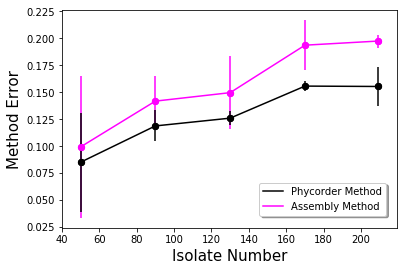

In [40]:
ax_mr = plt.gca()

same_graph_mr.plot(kind='scatter',x='isolate_number',y='phycord_abs_error', ax=ax_mr, s = 40, color='black')
same_graph_mr.plot(kind='scatter',x='isolate_number',y='gon_phy_abs_error', color='magenta', ax=ax_mr, s = 40)
same_graph_mr.plot(kind='line',x='isolate_number',y='phycord_abs_error',ax=ax_mr, label="Phycorder Method", color='black')
same_graph_mr.plot(kind='line',x='isolate_number',y='gon_phy_abs_error', color='magenta', ax=ax_mr, label="Assembly Method")
#plt.errorbar(same_graph_mr['isolate_number'],same_graph_mr['phycord_abs_error'], yerr=same_graph_mr['phycorder_abs_std'], fmt='o')
plt.xlim(same_graph_mr["isolate_number"].min() - 10,same_graph_mr["isolate_number"].max() + 10)
plt.xlabel("Isolate Number", fontsize=15)
plt.ylabel("Method Error", fontsize=15)
plt.errorbar(same_graph_mr['isolate_number'],same_graph_mr['gon_phy_abs_error'], yerr=same_graph_mr['gon_phy_abs_std'], fmt='o', label = None, mec = 'magenta', color = 'magenta')
plt.errorbar(same_graph_mr['isolate_number'],same_graph_mr['phycord_abs_error'], yerr=same_graph_mr['phycorder_abs_std'], fmt='o', label = None, mec = 'black', color = 'black')
ax_mr.legend(loc='upper center', bbox_to_anchor=(0.78, .23),shadow=True)

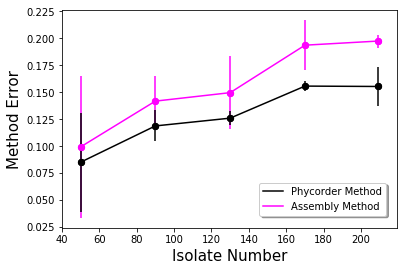

In [39]:
ax_bt = plt.gca()

same_graph_bt.plot(kind='scatter',x='isolate_number',y='phycord_abs_error',ax=ax_bt, s = 40, color='black')
same_graph_bt.plot(kind='scatter',x='isolate_number',y='gon_phy_abs_error', color='magenta', ax=ax_bt, s = 40)
same_graph_bt.plot(kind='line',x='isolate_number',y='phycord_abs_error',ax=ax_bt, label="Phycorder Method", color='black')
same_graph_bt.plot(kind='line',x='isolate_number',y='gon_phy_abs_error', color='magenta', ax=ax_bt, label="Assembly Method")
plt.xlim(same_graph_bt["isolate_number"].min() - 10,same_graph_bt["isolate_number"].max() + 10)
plt.xlabel("Isolate Number", fontsize=15)
plt.ylabel("Method Error", fontsize=15)
plt.errorbar(same_graph_bt['isolate_number'],same_graph_bt['gon_phy_abs_error'], yerr=same_graph_bt['gon_phy_abs_std'], fmt='o', label = None, mec = 'magenta', color = 'magenta')
plt.errorbar(same_graph_bt['isolate_number'],same_graph_bt['phycord_abs_error'], yerr=same_graph_bt['phycorder_abs_std'], fmt='o', label = None, mec = 'black', color = 'black')
ax_bt.legend(loc='upper center', bbox_to_anchor=(0.78, .23),shadow=True)

In [41]:
ax_mr.figure.savefig(replicate_dir + "/"+ 'maj_rule_combined_compare_results.png')
ax_bt.figure.savefig(replicate_dir + "/"+ 'best_tree_combined_compare_results.png')

In [12]:
fasta_with_names = ''
true_tree_file = ''

# establishes how to count each taxon in a tree in order to calculate maxRF
name_id = "taxon"

# regex that searches for names based on how we expect taxa to be named in the tree
name_regex = name_id + "_\d+"

name_grabber = re.compile(name_regex)

# find all taxa names in tree
# true_tree_taxa_names = re.findall(name_grabber, read_tree)

fasta_file_open = open(fasta_with_names, 'r')
read_fasta = fasta_file_open.read()
step_count_taxa = read_fasta.count("taxon")

tree_file_open = open(true_tree_file, 'r')
read_tree = tree_file_open.read()

# find all taxa names in tree
true_tree_taxa_names = re.findall(name_grabber, read_tree)

fasta_taxa_names = re.findall(name_grabber, read_fasta)

shared_names_list = []
for name in true_tree_taxa_names:
    if name in fasta_taxa_names:
        shared_names_list.append(name)

names_not_shared_list = []
for name in true_tree_taxa_names:
    if name not in shared_names_list:
        names_not_shared_list.append(name)


# establish common taxon namespace
tns = dendropy.TaxonNamespace()

# ensure all trees loaded use common namespace
true_tree = dendropy.Tree.get(
    path = true_tree_file,
    schema = 'newick',
#             rooting="force-rooted",
    preserve_underscores = True,
    taxon_namespace = tns)


# remove tips from true tree that aren't present in current estimate tree
true_tree.prune_taxa_with_labels(names_not_shared_list)


true_tree.write(path="/home/vortacs/210_simu_files/210_full_run/true_tree_40_taxa.tre", schema="newick")

print("complete")






# for tip in true_tree.leaf_iter():
#     print(tip)
# print(names_not_shared_list)

# for label in names_not_shared_list:
#     tns.remove_taxon_label(label)

# for i in range(100):
#     sim_tree = dendropy.simulate.treesim.birth_death_tree(1,0.8, num_extant_tips = len(tree2.leaf_nodes()), taxon_namespace = tns)
#     print(treecompare.symmetric_difference(sim_tree, tree2))

complete


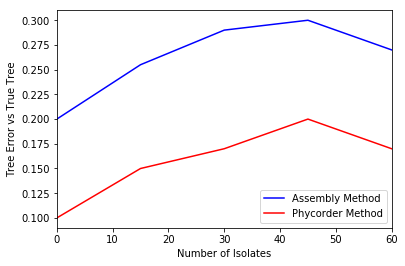

In [130]:

columns = ['phycorder_error', 'assembly_error']
#data = np.array([np.arange(10)]*2).T
data = np.array([0.1, 0.2, 0.15, 0.255, 0.17, 0.29, 0.2, 0.30, 0.17, 0.27])


df = pd.DataFrame(data.reshape(5,2), columns = columns)


# df = pd.DataFrame(data, index=isolates, columns=columns)
# # df['assembly_error']+=5

df['isolates'] = df.index
df.loc[:,'isolates'] *= 15

ax = df.plot(y="assembly_error",x="isolates", color="b", label="Assembly Method")
df.plot(x="isolates",y="phycorder_error", color="r", ax=ax, label="Phycorder Method")

ax.set_xlabel("Number of Isolates")
ax.set_ylabel("Tree Error vs True Tree")
ax.figure.savefig(replicate_dir + "/"+ 'fake_comparison_results.png')

In [12]:
# # original list
# s1 = "((A,D),(B,C));"
# s2 = "((A,B),(D,C));"

# # tree1 = dendropy.Tree.get(
# #         data=s1,
# #         schema="newick")

# # tree2 = dendropy.Tree.get(
# #         data=s2,
# #         schema="newick")


# tns = dendropy.TaxonNamespace()

# # ensure all trees loaded use common namespace
# tree1 = dendropy.Tree.get(
#         data=s1,
#         schema='newick',
#         taxon_namespace=tns)
# tree2 = dendropy.Tree.get(
#         data=s2,
#         schema='newick',
#         taxon_namespace=tns)

# ## Unweighted Robinson-Foulds distance
# print(treecompare.symmetric_difference(tree1, tree2))

# print(tree1.as_ascii_plot())
# print(tree2.as_ascii_plot())

# tree1.write(
#     path="/home/vortacs/tree1.newick",
#     schema="newick",
#     )

# tree2.write(
#     path="/home/vortacs/tree2.newick",
#     schema="newick",
#     )


s1 = "(a,(b,(c,d)));"
s2 = "(a,(d,(b,c)));"

# establish common taxon namespace
tns = dendropy.TaxonNamespace()

# ensure all trees loaded use common namespace
tree1 = dendropy.Tree.get(
        data=s1,
        schema='newick',
        taxon_namespace=tns)
tree2 = dendropy.Tree.get(
        data=s2,
        schema='newick',
        taxon_namespace=tns)

## Unweighted Robinson-Foulds distance
print(treecompare.symmetric_difference(tree1, tree2))

print(tree1.as_ascii_plot())
print(tree2.as_ascii_plot())

tree1.write(
    path="/home/vortacs/tree1.newick",
    schema="newick",
    )

tree2.write(
    path="/home/vortacs/tree2.newick",
    schema="newick",
    )

2
/--------------------------------------------------------------------------------------------------------------------------------------------- a
|                                                                                                                                               
+--------------------------------------------------------------------------------------------------------------------------------------------- b
|                                                                                                                                               
|                                                                      /---------------------------------------------------------------------- c
\----------------------------------------------------------------------+                                                                        
                                                                       \--------------------------------------------------------